In [18]:
import numpy as np 
import pandas as pd 
import random 

In [19]:
pmf = []
for i in range(1000):
    pmf.append(random.randint(1,6))

pmf = pd.Series(pmf)
pmf

0      2
1      1
2      5
3      3
4      6
      ..
995    5
996    6
997    2
998    2
999    6
Length: 1000, dtype: int64

In [20]:
pmf  = (pmf.value_counts()/pmf.value_counts().sum()).sort_index()
pmf

1    0.183
2    0.191
3    0.169
4    0.155
5    0.141
6    0.161
Name: count, dtype: float64

<Axes: >

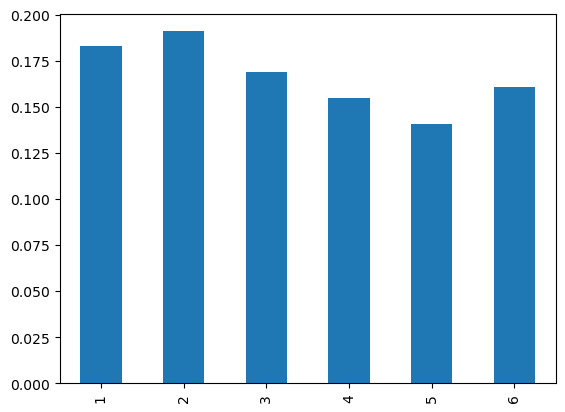

In [21]:
pmf.plot(kind = 'bar')

In [22]:
# pmf for 2 dice sum 
pmf2 = []
for i in range(1000):
    pmf2.append(random.randint(1,6) + random.randint(1,6))
pmf2 = pd.Series(pmf2)

In [23]:
pmf2 =(pmf2.value_counts()/ pmf2.value_counts().sum()).sort_index()
pmf2

2     0.024
3     0.051
4     0.098
5     0.099
6     0.138
7     0.165
8     0.131
9     0.115
10    0.093
11    0.059
12    0.027
Name: count, dtype: float64

<Axes: >

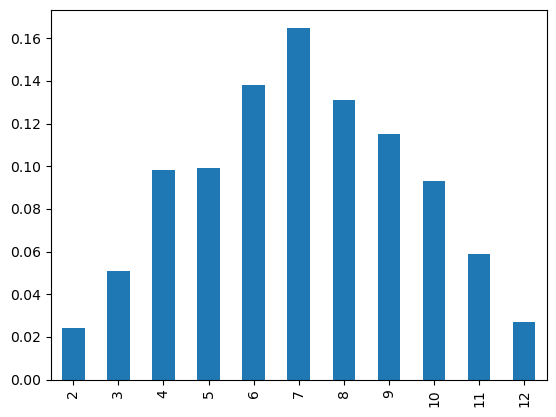

In [24]:
pmf2.plot(kind = 'bar')

In [25]:
#cdf of a pmf 
cdf  = np.cumsum(pmf)
cdf

1    0.183
2    0.374
3    0.543
4    0.698
5    0.839
6    1.000
Name: count, dtype: float64

<Axes: >

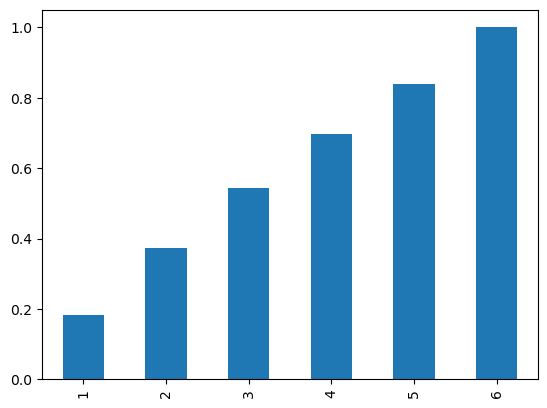

In [26]:
cdf.plot(kind = 'bar')

# Probability density function 

kde estimation ==> it is a method to estimte the pdf of a sample of data 

In [27]:
import numpy as np 
import seaborn as sns 

In [28]:
sample1 = np.random.normal(loc = 20 , scale = 5 , size = 300)
sample2 = np.random.normal(loc = 40 , scale = 5 , size = 70)
sample = np.hstack((sample1 , sample2))
sample

array([18.45098456, 28.53058111, 14.48453125, 25.74509042, 22.93868915,
       20.54245596, 25.21739353, 25.41084814, 24.00520075, 19.90415396,
       11.98590994, 27.64596995, 20.96147191, 25.5276186 , 16.69447893,
       20.08166641, 21.89121243, 17.89200906, 18.04798902, 21.41481594,
       28.99864317, 30.82748383, 20.85492309, 29.13226195, 20.18283769,
       11.19964065, 25.53141926, 15.08219743, 22.23973498, 12.99827817,
       21.52771825, 19.18653401, 17.59727536, 12.03049072, 16.16898906,
       13.21194051, 19.61084003, 18.86209838, 26.44932889, 22.97657041,
       18.17740657, 17.1598343 , 15.70018004, 25.22084701, 17.57384529,
       16.46070976, 14.93534993, 27.10750822, 14.39806211, 35.13368737,
       17.03214517, 29.13331383, 18.21501634, 15.2838594 , 20.7815957 ,
       18.28343686, 19.78199553, 26.94863248, 32.38258672, 13.79470493,
       17.80766682, 15.04043059, 15.09046425, 19.99699746, 11.4456623 ,
       21.58603414, 17.41924111, 15.81866116, 18.68020337, 25.34

In [29]:
sample.shape

(370,)

(array([ 1.,  2.,  3.,  2.,  4.,  4.,  5., 12., 18., 12., 20., 17., 22.,
        31., 22., 23., 20., 19., 10., 13.,  9.,  7.,  6.,  6.,  3.,  4.,
         4.,  1.,  2.,  6.,  8.,  4.,  6.,  3.,  7.,  6.,  4.,  7.,  3.,
         1.,  4.,  3.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 6.41269636,  7.39293611,  8.37317585,  9.3534156 , 10.33365534,
        11.31389508, 12.29413483, 13.27437457, 14.25461432, 15.23485406,
        16.21509381, 17.19533355, 18.17557329, 19.15581304, 20.13605278,
        21.11629253, 22.09653227, 23.07677202, 24.05701176, 25.0372515 ,
        26.01749125, 26.99773099, 27.97797074, 28.95821048, 29.93845023,
        30.91868997, 31.89892972, 32.87916946, 33.8594092 , 34.83964895,
        35.81988869, 36.80012844, 37.78036818, 38.76060793, 39.74084767,
        40.72108741, 41.70132716, 42.6815669 , 43.66180665, 44.64204639,
        45.62228614, 46.60252588, 47.58276563, 48.56300537, 49.54324511,
        50.52348486, 51.5037246 , 52.48396435, 53.46420409,

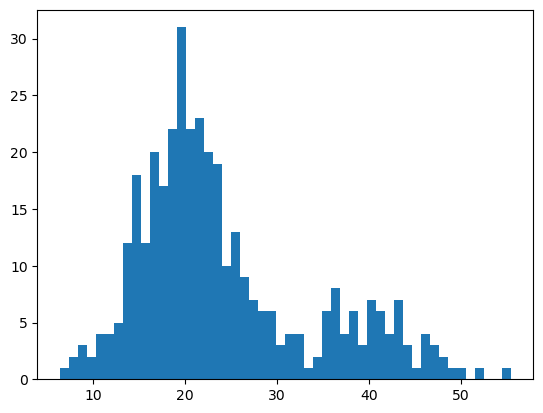

In [30]:
from matplotlib import pyplot as plt 
plt.hist(sample , bins = 50)

In [31]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth = 1 , kernel = 'gaussian')
model.fit(sample.reshape((len(sample)) , 1))

KernelDensity(bandwidth=1)

In [32]:
values = np.linspace(sample.min() , sample.max() , 100)
probabilities = model.score_samples(values.reshape((len(values) , 1)))
probabilities = np.exp(probabilities)

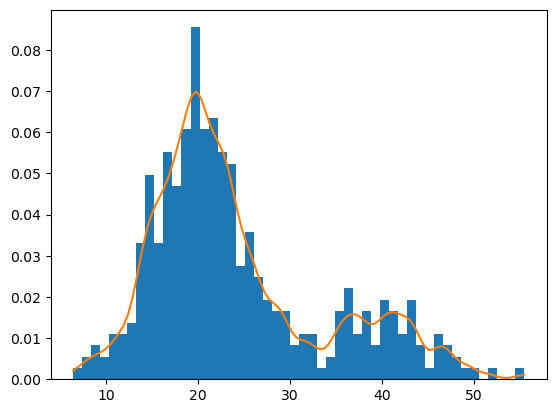

In [33]:
plt.hist(sample , bins = 50 , density = True)
plt.plot(values[:] , probabilities)
plt.show()

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

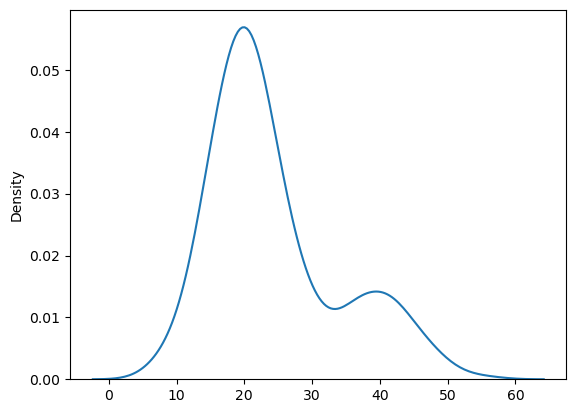

In [34]:
#directly using sns 
sns.kdeplot(sample,bw_adjust=1)

# How to use pdf 
Here petal_length, petal_Width are better indicator of species that sepal

In [35]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_length', ylabel='Density'>

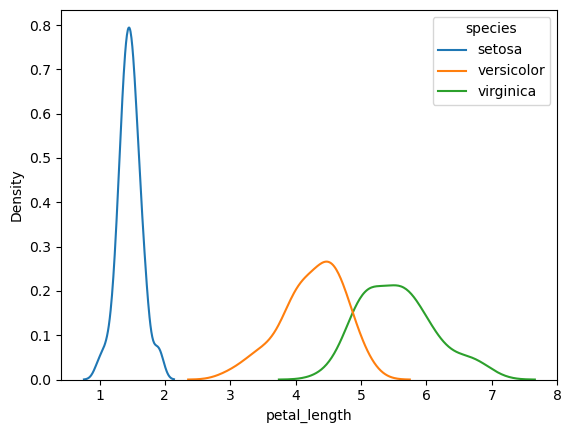

In [37]:
sns.kdeplot(data=df , x = 'petal_length' , hue = 'species')

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_width', ylabel='Density'>

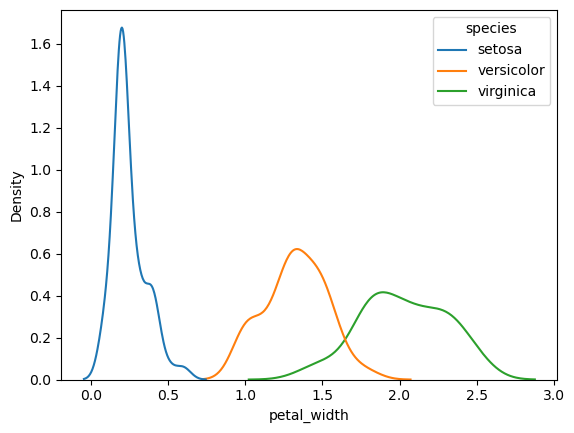

In [39]:
sns.kdeplot(data=df , x = 'petal_width' , hue = 'species')

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_length', ylabel='Density'>

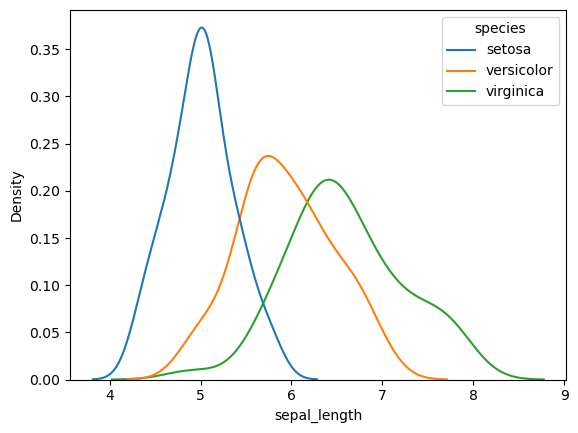

In [38]:
sns.kdeplot(data=df , x = 'sepal_length' , hue = 'species')

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Density'>

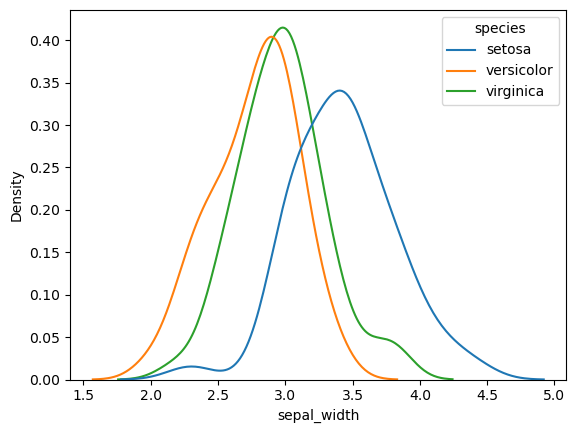

In [40]:
sns.kdeplot(data=df , x = 'sepal_width' , hue = 'species')

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_length', ylabel='Density'>

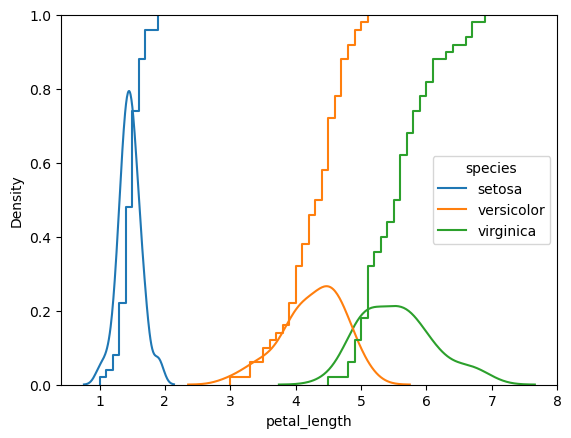

In [42]:
#cdf plot 
sns.kdeplot(data = df , x = 'petal_length' , hue = 'species')
sns.ecdfplot(data = df , x = 'petal_length' , hue = 'species')

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'char'
  cset = contour_func(
/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/h

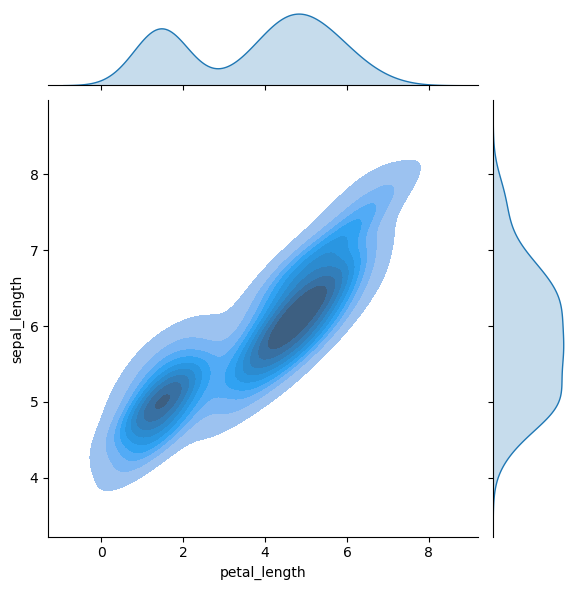

In [43]:
# 2D distirubtion plot pdf 
sns.jointplot(data = df , x = 'petal_length' , y = 'sepal_length' , kind = 'kde' , fill = True , char = True)

In [44]:
#Titanic
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

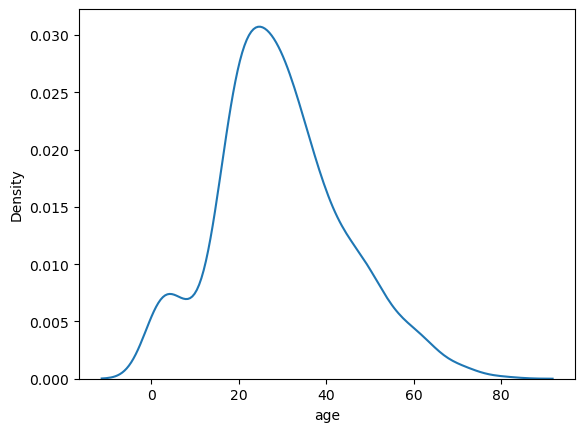

In [46]:
sns.kdeplot(data = df , x = 'age')

In [49]:
df['age'].std()

14.526497332334044

In [50]:
df['age'] = (df['age'] - df['age'].mean())/df['age'].std()

/home/sachin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

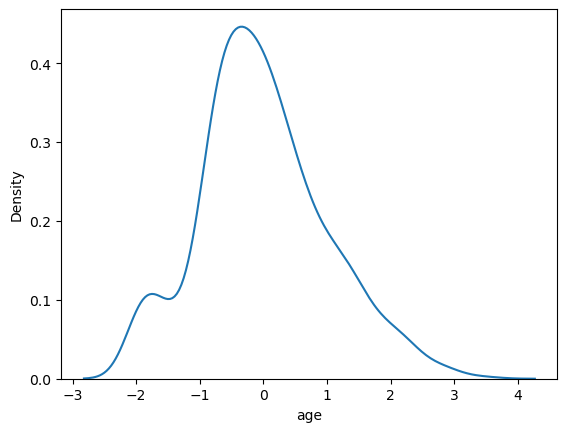

In [51]:
sns.kdeplot(data = df , x = 'age')

In [52]:
print(df['age'].mean())
print(df['age'].std())

2.388378943731429e-16
0.9999999999999994


In [53]:
df['age'].skew()

0.38910778230082615